In [119]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats.mstats import gmean
import pandas as pd

In [120]:
# GDP
df = wb.download(indicator='NY.GDP.MKTP.KD.ZG',country='all',
                 start=1960, end=2022)


In [121]:
df = df.reset_index()
df = df.sort_values(['country','year'],ascending=True)
df = df.reset_index(drop=True)


In [122]:
tmplist = []
sdf = df.query('year>"2010"')
sdf = sdf.sort_values(['country','year'],ascending=True)
mask = sdf['NY.GDP.MKTP.KD.ZG'].notna()
sdf = sdf[mask]

In [123]:
for i in sdf.country.unique():
    sdf2 = sdf['NY.GDP.MKTP.KD.ZG'][sdf['country']==i]
    tmplist.append([i,gmean(sdf2)])


C:\Users\thyt\tfgpu2\.venv\lib\site-packages\scipy\stats\stats.py:275: RuntimeWarning:

invalid value encountered in log

C:\Users\thyt\tfgpu2\.venv\lib\site-packages\scipy\stats\stats.py:275: RuntimeWarning:

divide by zero encountered in log



In [124]:
rankdf = pd.DataFrame([tmplist][0],columns=['country','value'])
rankdf = rankdf[rankdf.value.notna()]

In [128]:
top_country = rankdf.sort_values('value',ascending=False)[:10]['country']

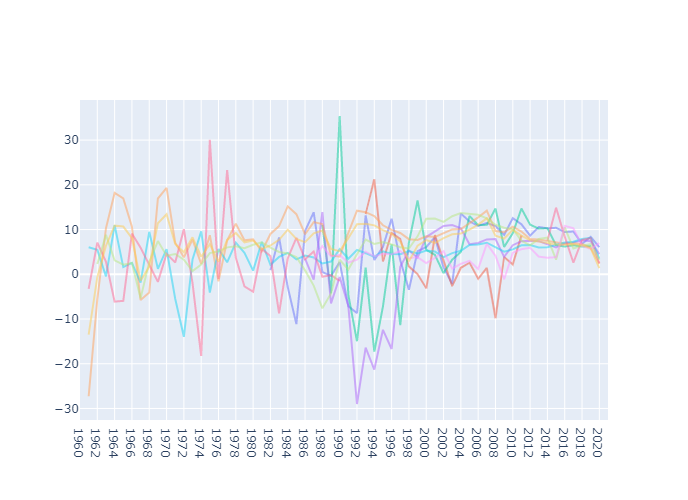

In [131]:
fig = go.Figure()
for i in top_country.values:
    fig.add_trace(go.Scatter(x=df['year'][df['country'] == i],
                   y=df['NY.GDP.MKTP.KD.ZG'][df['country'] == i],name =i,
                             opacity=0.5))
fig.update_layout(
    # title=dict(text='<b>Time Series of Stock Prices',
    #                          font=dict(size=26,
    #                                    color='grey'),
    #                          y=0.88
    #                         ),
    #               legend=dict(xanchor='left',
    #                           yanchor='bottom',
    #                           x=0.02,
    #                           y=0.83,
    #                          ),
                width=700,
                  height=500,
    showlegend=False
)
fig.show()

